<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-valeriaarh/blob/main/Actividad_Semanal6_Visualizacio%CC%81n_A01240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad Semanal -- 6, visualización**

Ciencia y Analítica de datos

Alumna: Valeria Alejandra Ramirez Herrera

Matricula: A01240716

Profesor: Dr. María de la Paz Rico

Fecha: 01/Noviembre/2022

##**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import scipy.stats as stats #librería para normalizar
import statistics as sts #desviación estántar
from statistics import mode #moda
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

##**1. Descarga de datos**

In [ ]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
df=pd.read_csv(input, index_col = 0) #Aquí se encuentran los datos originales y se ponen como Data Frame
df.index.name= None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


##**2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [ ]:
df.shape
#Se regresa un arreglo con las dimensiones del data set: 30,000 renglos x 24 columnas


(30000, 24)

In [ ]:
df.columns
#Se regresan las columnas que se tiene en el dataset

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df.head()
#Se muestran los primeros 5 renglones 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.dtypes
#Se muestra el tipo de datos que tiene cada columna

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [ ]:
df.isna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any() #En cuáles columnas falta al menos 1 dato

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

##**3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

Esta actividad se basará en la información dada en https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

donde se puede ver la información de cada variable.

Así que las variables se pueden clasificar en categóricas y numéricas, de la siguiente manera:

- Columnas con datos categóricos: X2, X3, X4, X6, X7, X8, X9, X10, X11, Y (Salida Binaria)
- Columnas con datos continuos: X1, X5, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  - X6 = the repayment status in September, 2005; 
  - X7 = the repayment status in August, 2005; . . .;
  - X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
  - X12 = amount of bill statement in September, 2005; 
  - X13 = amount of bill statement in August, 2005; . . .; 
  - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
  - X18 = amount paid in September, 2005; 
  - X19 = amount paid in August, 2005; . . .;
  - X23 = amount paid in April, 2005. 



In [ ]:
clean_df = df.copy()

#Variables de Entrada CATEGORICAS
#Se usa la moda para llenar espacio vacíos
clean_df['X2'].fillna(value= clean_df['X2'].mode()[0], inplace = True)
clean_df['X3'].fillna(value= clean_df['X3'].mode()[0], inplace = True)
clean_df['X4'].fillna(value= clean_df['X4'].mode()[0], inplace = True)
clean_df['X6'].fillna(value= clean_df['X6'].mode()[0], inplace = True)
clean_df['X7'].fillna(value= clean_df['X7'].mode()[0], inplace = True)
clean_df['X8'].fillna(value= clean_df['X8'].mode()[0], inplace = True)
clean_df['X9'].fillna(value= clean_df['X9'].mode()[0], inplace = True)
clean_df['X10'].fillna(value= clean_df['X10'].mode()[0], inplace = True)
clean_df['X11'].fillna(value= clean_df['X11'].mode()[0], inplace = True)

clean_df=clean_df.replace({'X3':5},4) #Todo lo que tenga un 5 para la columna 3, se cambia a 4=others
clean_df=clean_df.replace({'X3':6},4) #Todo lo que tenga un 6 para la columna 3, se cambia a 4=others
clean_df=clean_df.replace({'X3':0},4) #Todo lo que tenga un 0 para la columna 3, se cambia a 4=others
clean_df=clean_df.replace({'X4':0},3) #Todo lo que tenga un 0 para la columna 4, se cambia a 3=others

clean_df=clean_df.replace({'X6':-2},-1) #Todo lo que tenga un -2 para la columna 6, se cambia a -1=pay duly
clean_df=clean_df.replace({'X6':0},-1) #Todo lo que tenga un 0 para la columna 6, se cambia a -1=pay duly
clean_df=clean_df.replace({'X7':-2},-1) #Todo lo que tenga un -2 para la columna 7, se cambia a -1=pay duly
clean_df=clean_df.replace({'X7':0},-1) #Todo lo que tenga un 0 para la columna 7, se cambia a -1=pay duly
clean_df=clean_df.replace({'X8':-2},-1) #Todo lo que tenga un -2 para la columna 8, se cambia a -1=pay duly
clean_df=clean_df.replace({'X8':0},-1) #Todo lo que tenga un 0 para la columna 8, se cambia a -1=pay duly
clean_df=clean_df.replace({'X9':-2},-1) #Todo lo que tenga un -2 para la columna 9, se cambia a -1=pay duly
clean_df=clean_df.replace({'X9':0},-1) #Todo lo que tenga un 0 para la columna 9, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':-2},-1) #Todo lo que tenga un -2 para la columna 10, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':0},-1) #Todo lo que tenga un 0 para la columna 10, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':-2},-1) #Todo lo que tenga un -2 para la columna 11, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':0},-1) #Todo lo que tenga un 0 para la columna 11, se cambia a -1=pay duly

#Variables de Entrada NUMERICAS
#Se usa la mediana para llenar espacio vacíos
clean_df['X1'].fillna(value= clean_df['X1'].mean(), inplace = True)
clean_df['X5'].fillna(value= clean_df['X5'].mean(), inplace = True)
clean_df['X12'].fillna(value= clean_df['X12'].mean(), inplace = True)
clean_df['X13'].fillna(value= clean_df['X13'].mean(), inplace = True)
clean_df['X14'].fillna(value= clean_df['X14'].mean(), inplace = True)
clean_df['X15'].fillna(value= clean_df['X15'].mean(), inplace = True)
clean_df['X16'].fillna(value= clean_df['X16'].mean(), inplace = True)
clean_df['X17'].fillna(value= clean_df['X17'].mean(), inplace = True)
clean_df['X18'].fillna(value= clean_df['X18'].mean(), inplace = True)
clean_df['X19'].fillna(value= clean_df['X19'].mean(), inplace = True)
clean_df['X20'].fillna(value= clean_df['X20'].mean(), inplace = True)
clean_df['X21'].fillna(value= clean_df['X21'].mean(), inplace = True)
clean_df['X22'].fillna(value= clean_df['X22'].mean(), inplace = True)
clean_df['X23'].fillna(value= clean_df['X23'].mean(), inplace = True)

#Variable de Salida CATEGORICAS
#Se usa la moda para llenar espacio vacíos
clean_df['Y'].fillna(value= clean_df['Y'].mode()[0], inplace = True)


clean_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,-1.0,-1.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#Y se hace la confirmación de si siguen datos faltantes
clean_df.isnull().any() 

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

##**4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [ ]:
clean_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603767,1.842200,1.557333,35.484214,-0.415967,-0.532033,-0.555800,-0.624433,-0.679767,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221167
std,129747.661567,0.489122,0.744436,0.521397,9.217256,1.142591,1.146393,1.125194,1.067312,1.001491,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415039
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


A continuación se describen, de manera general, las medidas de tendencia central y dispersión que se encuentran en la tabla que se acaba de obtener

**Count**: Se muestra la cantidad de datos disponibles en el data set, con valores reales, en caso de haber un NaN, se omite.

**Mean**: Se refiere a la suma de todos los datos entre la cantidad de datos disponibles. También conocido como promedio.

**Std**: o desviación estándar, esta es una medida de dispersión, donde se da una idea qué tan dispersos están los datos. A mayor std, mayor la dispersión de los datos.

**min**: Valor mínimo en cada columna

**Percentiles**
Para esta medida, el conjunto de datos es ordenado de mayor a mayor en cien partes iguales. Y es el indicador de la proporción de los datos y ver dónde se encuentra un valor respecto a la muestra:
  - 25%
  - 50% 
  - 75% 

**max**: Valor máximo de cada columna.

##**5. Realiza el conteo de las variables categóricas**

In [ ]:
clean_df.value_counts(['X2'])

X2 
2.0    18113
1.0    11887
dtype: int64

In [ ]:
clean_df.value_counts(['X3'])

X3 
2.0    14032
1.0    10585
3.0     4915
4.0      468
dtype: int64

In [ ]:
clean_df.value_counts(['X4'])

X4 
2.0    15966
1.0    13657
3.0      377
dtype: int64

In [ ]:
clean_df.value_counts(['X6'])

X6  
-1.0    23182
 1.0     3688
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
dtype: int64

In [ ]:
clean_df.value_counts(['X7'])

X7  
-1.0    25562
 2.0     3927
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
dtype: int64

In [ ]:
clean_df.value_counts(['X8'])

X8  
-1.0    25788
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
dtype: int64

In [ ]:
clean_df.value_counts(['X9'])

X9  
-1.0    26492
 2.0     3157
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
dtype: int64

In [ ]:
clean_df.value_counts(['X10'])

X10 
-1.0    27034
 2.0     2624
 3.0      178
 4.0       84
 7.0       58
 5.0       17
 6.0        4
 8.0        1
dtype: int64

In [ ]:
clean_df.value_counts(['X11'])

X11 
 0.0    16292
-1.0     5735
-2.0     4895
 2.0     2765
 3.0      184
 4.0       49
 7.0       46
 6.0       19
 5.0       13
 8.0        2
dtype: int64

In [ ]:
clean_df.value_counts(['Y'])

Y  
0.0    23365
1.0     6635
dtype: int64

##**6. Escala los datos, si consideras necesario**

In [ ]:
#Se procede a hacer la escalación/normalización de los datos y tengan valores similares 

scaler = StandardScaler()
normalized = scaler.fit_transform(clean_df)

df_norm = pd.DataFrame(normalized, columns=df.columns)
df_norm

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136720,0.810104,0.211976,-1.068940,-1.245968,2.114498,2.208732,-0.394783,-0.351887,-0.319762,...,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426,1.87656
1,-0.365981,0.810104,0.211976,0.849015,-1.028980,-0.511157,2.208732,-0.394783,-0.351887,-0.319762,...,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922,1.87656
2,-0.597202,0.810104,0.211976,0.849015,-0.161028,-0.511157,-0.408215,-0.394783,-0.351887,-0.319762,...,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165,-0.53289
3,-0.905498,0.810104,0.211976,-1.068940,0.164454,-0.511157,-0.408215,-0.394783,-0.351887,-0.319762,...,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174,-0.53289
4,-0.905498,-1.234409,0.211976,-1.068940,2.334333,-0.511157,-0.408215,-0.394783,-0.351887,-0.319762,...,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231,-0.53289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234409,1.555298,-1.068940,0.381442,-0.511157,-0.408215,-0.394783,-0.351887,-0.319762,...,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174,-0.53289
29996,-0.134759,-1.234409,1.555298,0.849015,0.815417,-0.511157,-0.408215,-0.394783,-0.351887,-0.319762,...,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426,-0.53289
29997,-1.059646,-1.234409,0.211976,0.849015,0.164454,3.864934,3.081047,2.271468,-0.351887,-0.319762,...,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044,1.87656
29998,-0.674276,-1.234409,1.555298,-1.068940,0.598430,1.239280,-0.408215,-0.394783,-0.351887,-0.319762,...,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947,1.87656


##**7. Reduce las dimensiones con PCA, si consideras necesario.**
- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
- Indica la importancia de las variables en cada componente

In [ ]:
#Para poder aplicar PCA, se tienen que remover las variables categóricas ya que este método no funciona con este tipo de datos

df_norm.drop(['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], 
         axis = 1, 
         inplace = True
        )
df_norm

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,-1.245968,-0.642721,-0.647594,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-0.365981,-1.028980,-0.659440,-0.666943,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-0.597202,-0.161028,-0.298760,-0.494087,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-0.905498,0.164454,-0.057678,-0.013457,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-0.905498,2.334333,-0.578834,-0.611511,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381442,1.870300,2.018069,2.326634,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174
29996,-0.134759,0.815417,-0.673007,-0.665495,-0.627638,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426
29997,-1.059646,0.164454,-0.647447,-0.644025,-0.638367,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044
29998,-0.674276,0.598430,-0.718206,0.410125,0.422219,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947


In [ ]:
pca = PCA()
pca.fit(preprocessing.scale(df_norm.dropna(axis=0)))

PCA()

In [ ]:
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                             'Proportion of variance': pca.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                             })

pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
pcaSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
pcaSummary_df.iloc[2,4] #necesitamos 5 componentes principales para el 70% de varianza

0.7492018074541841

In [ ]:
#Aquí se muestra la importancia de los componentes para cada variable
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcaSummary_df.columns,
                                index=df_norm.columns
                                )
pcaFinalComponents_df = pcaComponents_df.iloc[:,:5]

##**8. Elabora los histogramas de los atributos para visualizar su distribución**

PC1 Component Histogram


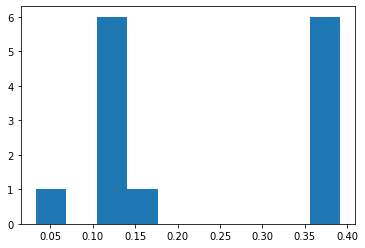

PC2 Component Histogram


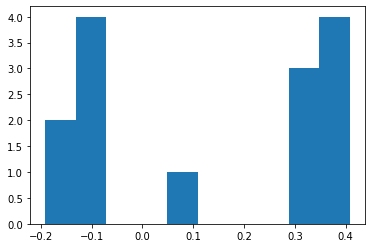

PC3 Component Histogram


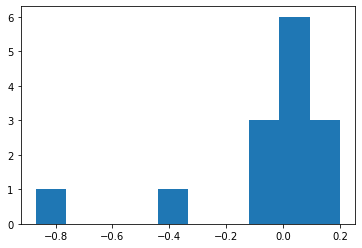

PC4 Component Histogram


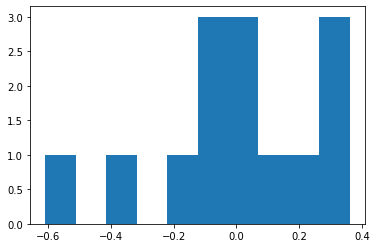

PC5 Component Histogram


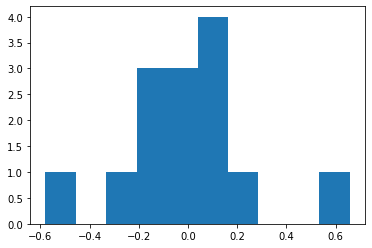

PC1    None
PC2    None
PC3    None
PC4    None
PC5    None
dtype: object

In [ ]:
def histogram_plot(x):
  print(f'{x.name} Component Histogram')
  plt.hist(x)
  plt.show()

pcaFinalComponents_df.apply(histogram_plot)

##**9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

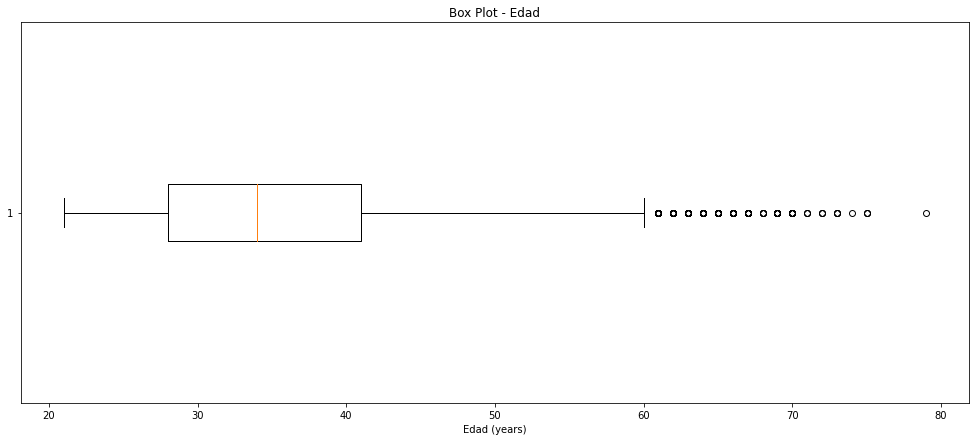

In [ ]:
plt.figure(figsize=(17,7))
plt.boxplot(clean_df.X5, vert=False)
plt.title('Box Plot - Edad')
plt.xlabel('Edad (years)')
plt.show()

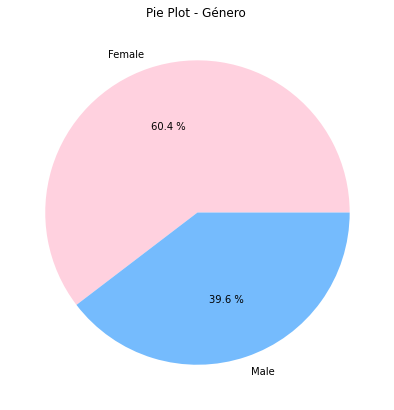

In [ ]:
plt.figure(figsize=(17,7))
plt.pie(clean_df.X2.value_counts(), labels=['Female', 'Male'], autopct="%0.1f %%", colors=['xkcd:light pink','xkcd:sky blue'])
plt.title('Pie Plot - Género ')
plt.show()

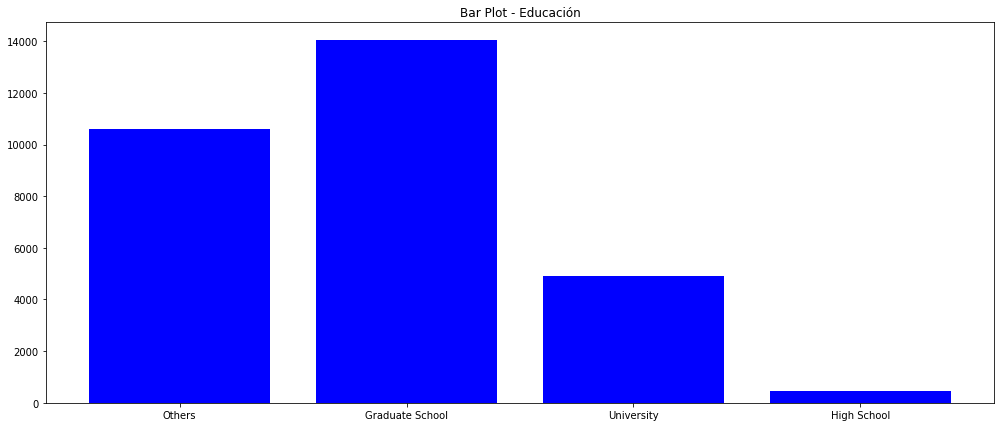

In [ ]:
plt.figure(figsize=(17,7))
plt.bar(['Others','Graduate School','University','High School'], clean_df.X3.value_counts().sort_index(), color='blue')
plt.title('Bar Plot - Educación')
plt.show()

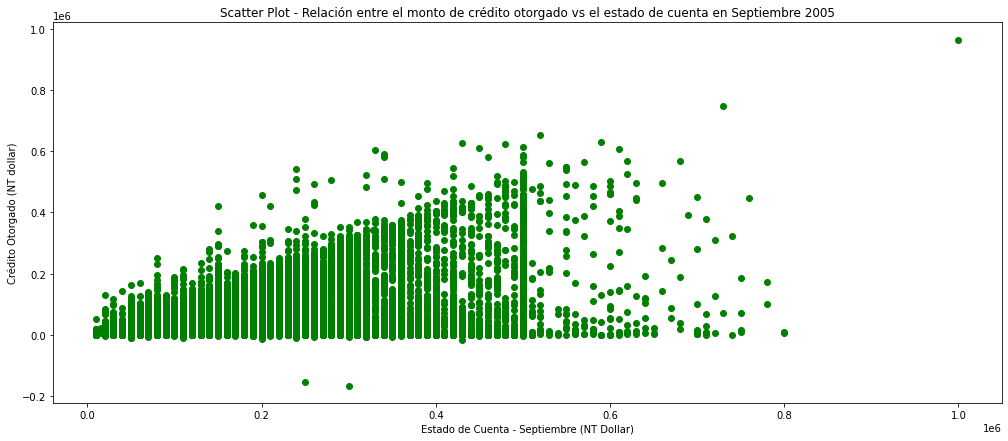

In [ ]:
plt.figure(figsize=(17,7))
plt.scatter(df.X1, df.X12, color='green')
plt.title("Scatter Plot - Relación entre el monto de crédito otorgado vs el estado de cuenta en Septiembre 2005")
plt.xlabel('Estado de Cuenta - Septiembre (NT Dollar)')
plt.ylabel('Crédito Otorgado (NT dollar)')
plt.show()


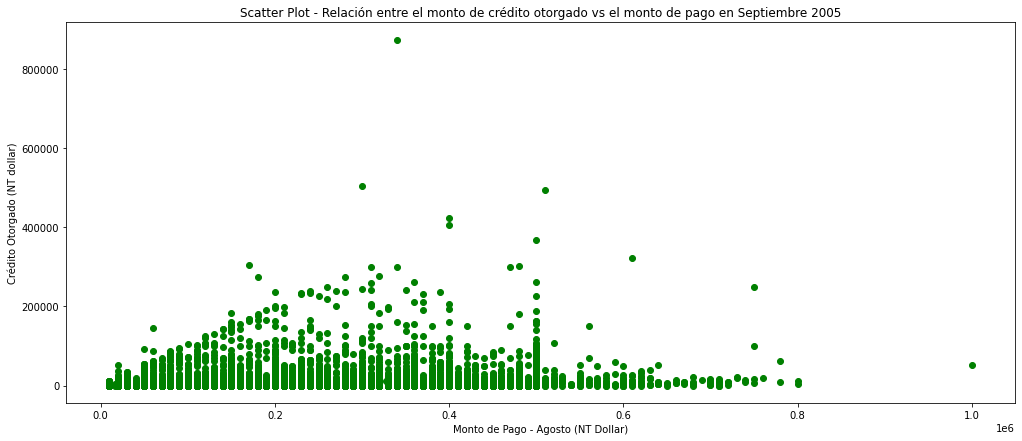

In [ ]:
plt.figure(figsize=(17,7))
plt.scatter(df.X1, df.X18, color='green')
plt.title("Scatter Plot - Relación entre el monto de crédito otorgado vs el monto de pago en Septiembre 2005")
plt.xlabel('Monto de Pago - Agosto (NT Dollar)')
plt.ylabel('Crédito Otorgado (NT dollar)')
plt.show()

##**10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

**Gráfica 1 - Box Plot**

Para esta gráfica se usó la variable "Age", y se puede ver cual es la diferentes edades de las personas que solicitan para el crédito. En la parte de la caja se observa que las personas que más aplican tienen entre 30-40 años. La información se puede representan en cuartiles, un ejemplo, el 50% de los datos rondan los 20-40 años, hay algunos outliers en el gráfico que representan las pocas personas mayores entre los 60-80 años que solicitan el crédito. Al final es una gráfica importante para ver cuáles son las edades que más aplican al crédito.

**Gráfica 2 - Pie Plot**

Para esta gráfica se usó la variable de "Gender", aquí se representa la distribución entre si las personas que hicieron la solicitud del crédito son mujeres u hombres. En este caso de puede ver que las mujeres son las que más solicitan el crédito con un porcentaje de +60% de presencia.

**Gráfica 3 - Bar Plot**

Aquí se usó la variable de "Education", en este caso el análisis en esta variable hace sentido ya que se puede saber la escolaridad que tiene la persona que está solicitando el crédito y se puede estimar si la persona será capaz de pagar el crédito. Por ejemplo, se puede ver que el mayor porcentaje le pertenece a "Graduate School" que podría considerarse o no un riesgo de No pago por los gastos que se pueden tener en esta parte de la educación.

**Gráfica 4-5 - Scatter Plot**

Aquí se hicieron dos representaciones respecto a la variable "X1" o "Amount of the given credit (NT dollar)", ambas gráficas fue para ver la correlación entre esta variable y la "X12" (Amount of bill statement Sep 2005) en la gráfica 4, mientras que para la gráfica 5 se usó "X18" (Amount of previous payment Sep 2005). En ambas gráficas se puede ver que no hay mucha correlación y su dispersión se va a lo largo de la gráfica sin lograr formar una recta.

##**Referencias**

Bellot, S. (2015, November 23). ¿Qué es el percentil y para qué sirve? Retrieved from El Mundo: https://www.elmundo.es/sapos-y-princesas/2015/11/23/56531754268e3ec4278b463c.html
MedWave. (2011, March 2). Medidas de tendencia central y dispersión. Retrieved from MedWave: https://www.medwave.cl/series/MBE04/4934.html
 
